In [1]:
import neurom as nm
from neurom import viewer
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
sys.path[0] = str(Path(sys.path[0]).parent)
from mouselight_code.src import read_swc, visualize, octree, combine_swc_img
from neurom.io import swc
from neurom import morphmath, stats


In [13]:
path2 = "test_neuron.swc"
path3 = "2018-08-01_G-200_consensus.swc"
path4 = "test_data/swc/test_neuron_no_soma.swc"
wrap = swc.read(path4, has_soma = False)
print(wrap.data_block[:,4])
gt_test = nm.load_neuron(path2)
conc_test = nm.load_neuron(path3)

#Correct 
broke = nm.load_neuron(path4)

SWC in custom format, reading > 4 as undefined
[0. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 

In [3]:
gt_test.soma.points

array([[ 0.    ,  0.    ,  0.    ,  5.2517],
       [-1.44  , -5.01  , -0.57  ,  5.2517],
       [ 1.44  ,  5.01  ,  0.57  ,  5.2517]])

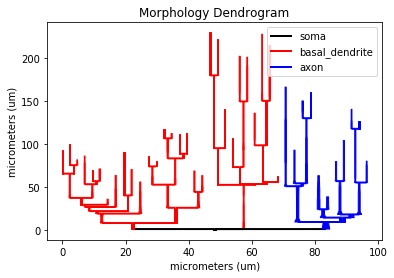

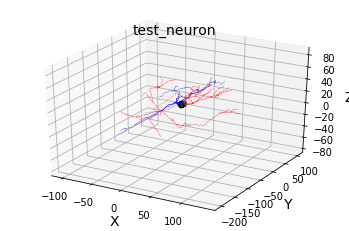

In [4]:
viewer.draw(gt_test, mode = 'dendrogram')
viewer.draw(gt_test, mode = '3d')
plt.show()

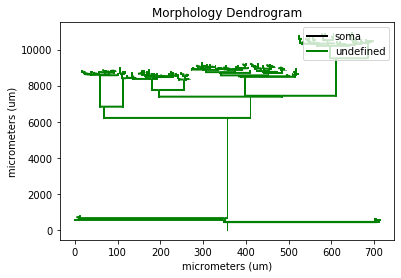

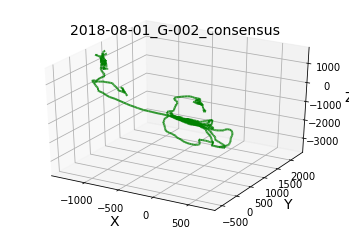

In [5]:

viewer.draw(conc_test, mode = 'dendrogram', output_path = 'NeuroM/figures')
plt.savefig('dendrogram.png')
viewer.draw(conc_test, mode = '3d', output_path = 'NeuroM/figures')
plt.savefig('3d_concensus.png')


In [6]:
# Morph math tests
print(morphmath.average_points_dist(conc_test.points[0], conc_test.points))
print(morphmath.angle_3points(conc_test.points[0],conc_test.points[4],conc_test.points[5]))


2916.9790537651943
0.24502379871349111


[324.2528590059562, 430.9442714724634, 11.970476445680802, 109.38151208930599, 52.43733029318233, 101.73533274327275, 35.79808375312252, 28.228344895207023, 10.861594777057695, 48.522127560923906, 135.6187219278915, 5552.397001884913, 624.218089758816, 1742.5468408998436, 23.59630870197162, 25.41287664557025, 8.86398922093327, 30.04579439126652, 12.569801588391462, 85.15238482531471, 3.443255869018612, 110.70248747441475, 11.152142775956893, 27.27396058405067, 9.610586576962566, 27.970378558376833, 102.71674372269553, 50.253251147193104, 68.82167595412315, 28.58143604842552, 8.375949261601367, 43.89062239137998, 28.341687535725267, 16.617410082116265, 7.270447176706537, 163.10282453704951, 118.3638424212549, 13.52126483005759, 97.75084781948442, 25.32496719853744, 55.259351259162074, 44.0884524278593, 30.758081189841693, 34.77707964341188, 31.90030726787955, 30.73870252010462, 37.50725432290994, 24.11322373752186, 93.64033757347197, 9.877728922848268, 37.0035905275375, 5.21995253599244

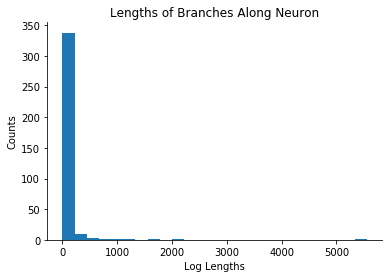

In [7]:
len_list = []
for i in range(len(conc_test.sections)):
    sections = conc_test.sections[i].length
#    len_list.append(np.log(sections))
    len_list.append(sections)
print(len_list)
ax = plt.subplot(111)
ax.hist(len_list, bins = 25)
plt.title("Lengths of Branches Along Neuron")
plt.xlabel("Log Lengths")
plt.ylabel("Counts")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("Branch_lens.png")
plt.show()


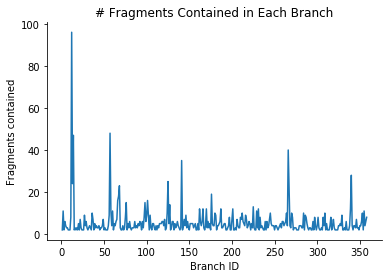

In [8]:
len_list = []
for i in range(len(conc_test.sections)):
    sections = len(conc_test.sections[i].points)
    len_list.append(sections)
#sections = len(conc_test.sections[6].children)
ax = plt.subplot(111)

ax.plot(range(1,len(conc_test.sections)+1),len_list)
plt.xlabel("Branch ID")
plt.ylabel("Fragments contained")
plt.title("# Fragments Contained in Each Branch")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("frag_counts.png")
plt.show()

### SWC tests